In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregando os dados

In [2]:
df = pd.read_csv('facies_vectors.csv')
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


#### Verificando a presença de amostras nulas e o tipo de variáveis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     4149 non-null   int64  
 1   Formation  4149 non-null   object 
 2   Well Name  4149 non-null   object 
 3   Depth      4149 non-null   float64
 4   GR         4149 non-null   float64
 5   ILD_log10  4149 non-null   float64
 6   DeltaPHI   4149 non-null   float64
 7   PHIND      4149 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       4149 non-null   int64  
 10  RELPOS     4149 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 356.7+ KB


Esse conjunto de dados foi disponibilizado em um desafio da  <a href="https://github.com/seg/2016-ml-contest"> SEG (2016) </a>. (Ver publicação: ).

Foi um desafio relativo a classificação de facies litolológicas (coluna Facies), onde as facies eram particionadas em 9 (nove) labels:

1. Nonmarine sandstone
2. Nonmarine coarse siltstone 
3. Nonmarine fine siltstone 
4. Marine siltstone and shale 
5. Mudstone (limestone)
6. Wackestone (limestone)
7. Dolomite
8. Packstone-grainstone (limestone)
9. Phylloid-algal bafflestone (limestone)

Facies |Label| Adjacent Facies | Facies

:---: | :---: |:--:

1 |SS| 2 | Nonmarine sandstone

2 |CSiS| 1,3 | Nonmarine coarse siltstone  

3 |FSiS| 2 | Nonmarine fine siltstone

4 |SiSh| 5 | Marine siltstone and shale

5 |MS| 4,6 | Mudstone (limestone)

6 |WS| 5,7 | Wackestone (limestone)

7 |D| 6,8 | Dolomite

8 |PS| 6,7,9 | Packstone-grainstone (limestone)

9 |BS| 7,8 | Phylloid-algal bafflestone (limestone)

#### Adicionando labels das facies na forma de caractere 

In [4]:
#Criando uma coluna com os labels (caracteres) das facies
def litologia(facies):
    if facies == 1: return 'Nonmarine sandstone'
    if facies == 2: return 'Nonmarine coarse siltstone'
    if facies == 3: return 'Nonmarine fine siltstone'
    if facies == 4: return 'Marine siltstone and shale'
    if facies == 5: return 'Mudstone (limestone)'
    if facies == 6: return 'Wackestone (limestone)'
    if facies == 7: return 'Dolomite'
    if facies == 8: return 'Packstone-grainstone (limestone)'
    if facies == 9:
        return 'Phylloid-algal bafflestone (limestone)'

In [5]:
df['Labels_char'] = df.Facies.apply(litologia)
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Labels_char
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,Nonmarine fine siltstone
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,Nonmarine fine siltstone
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,Nonmarine fine siltstone
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,Nonmarine fine siltstone
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,Nonmarine fine siltstone


In [6]:
# Escolhendo colunas a serem plotadas
cols = ['GR','ILD_log10','DeltaPHI','PHIND','PE']
well = 'SHRIMPLIN'

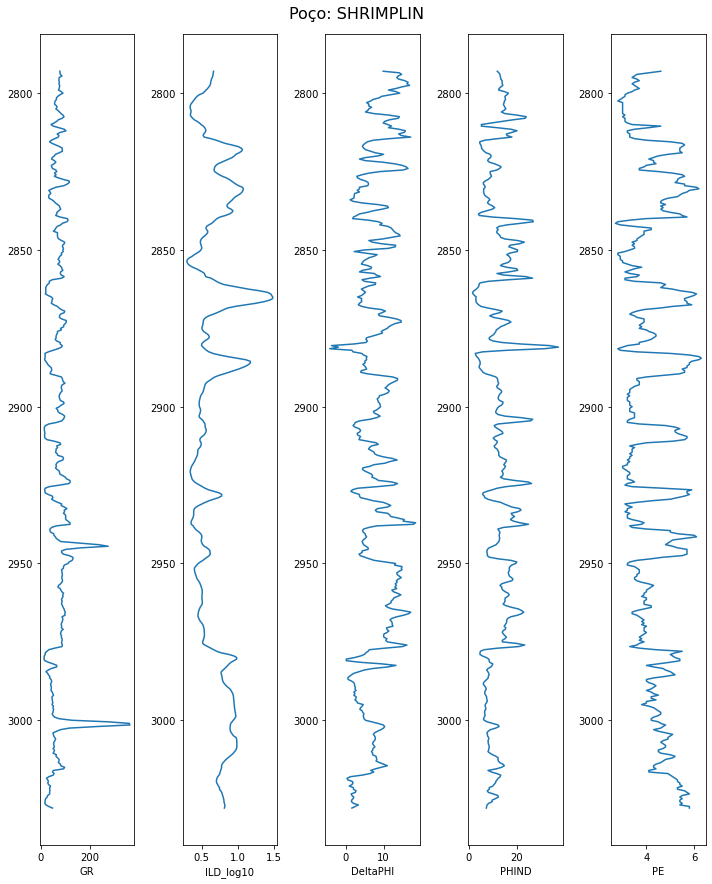

In [7]:
fig,axes = plt.subplots(ncols=5,figsize=(10,12))

for ax in axes:
    ax.invert_yaxis()

for i,ax in zip(cols,axes):
    ax.plot(df[df['Well Name']==well][i],df[df['Well Name']==well]['Depth'])
    ax.set_xlabel(i)

fig.suptitle(f'Poço: {well}', fontsize=16,y=1.02)
    
fig.tight_layout()

#### Vamos fazer umas análises rápida no conjunto de dados

In [8]:
#Verificando os valores NaN do PE
df[df.PE.isnull()]

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Labels_char
471,3,A1 SH,ALEXANDER D,2887.5,88.710,0.612,6.700,10.6050,NaN,1,1.000,Nonmarine fine siltstone
472,3,A1 SH,ALEXANDER D,2888.0,92.710,0.583,11.000,12.5150,NaN,1,0.974,Nonmarine fine siltstone
473,3,A1 SH,ALEXANDER D,2888.5,94.540,0.579,12.000,13.4100,NaN,1,0.949,Nonmarine fine siltstone
474,3,A1 SH,ALEXANDER D,2889.0,95.310,0.579,11.500,13.7500,NaN,1,0.923,Nonmarine fine siltstone
475,3,A1 SH,ALEXANDER D,2889.5,93.790,0.572,10.300,13.4050,NaN,1,0.897,Nonmarine fine siltstone
...,...,...,...,...,...,...,...,...,...,...,...,...
3227,9,C LM,Recruit F9,3129.5,19.160,1.162,2.586,7.6070,NaN,2,0.560,Phylloid-algal bafflestone (limestone)
3228,9,C LM,Recruit F9,3130.0,20.461,1.031,2.503,8.6935,NaN,2,0.548,Phylloid-algal bafflestone (limestone)
3229,9,C LM,Recruit F9,3130.5,23.425,0.791,4.017,9.9725,NaN,2,0.536,Phylloid-algal bafflestone (limestone)
3230,9,C LM,Recruit F9,3131.0,31.562,0.759,5.805,9.5265,NaN,2,0.524,Phylloid-algal bafflestone (limestone)


In [9]:
#Consultando Poços sem medidas de PE
df[df.PE.isnull()]['Well Name'].unique()

array(['ALEXANDER D', 'KIMZEY A', 'Recruit F9'], dtype=object)

##### Analisando variáveis qualitativas

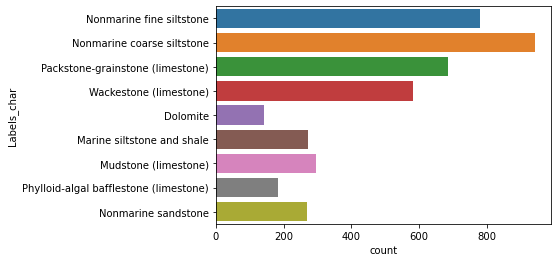

In [10]:
sns.countplot(y=df.Labels_char)

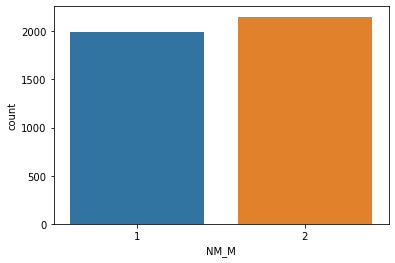

In [11]:
sns.countplot(x=df.NM_M)

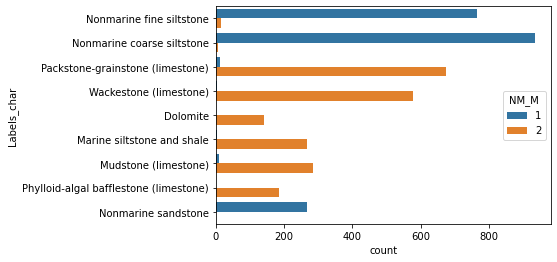

In [12]:
sns.countplot(y=df.Labels_char,hue=df.NM_M)

### Recuperando as Informações de $\phi_D$ e $\phi_N$

$$ DeltaPHI = \phi_{N}-\phi_{D} $$

$$ PHIND = \frac{\phi_{N}+\phi_{D}}{2} $$

$$ \phi_{N} = \frac{DeltaPHI + 2 \times PHIND}{2} $$

$$ \phi_{D} = \frac{-DeltaPHi +2 \times PHIND}{2} $$

In [13]:
def phi_N(delta_phi,phi_nd):
    delta_phi = np.asarray(delta_phi); phi_nd = np.asarray(phi_nd)
    return (delta_phi+(2*phi_nd))/2

def phi_D(delta_phi,phi_nd):
    delta_phi = np.asarray(delta_phi); phi_nd = np.asarray(phi_nd)
    return (-delta_phi+(2*phi_nd))/2

In [14]:
#Calculando as porosidades densidade e neutrônica
df['PHID'] = phi_D(df.DeltaPHI,df.PHIND)
df['PHIN'] = phi_N(df.DeltaPHI,df.PHIND)

In [15]:
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Labels_char,PHID,PHIN
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,Nonmarine fine siltstone,6.965,16.865
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,Nonmarine fine siltstone,5.465,19.665
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,Nonmarine fine siltstone,5.650,20.450
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,Nonmarine fine siltstone,6.165,20.065
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,Nonmarine fine siltstone,6.550,20.050


### Obtendo a matriz de correlação

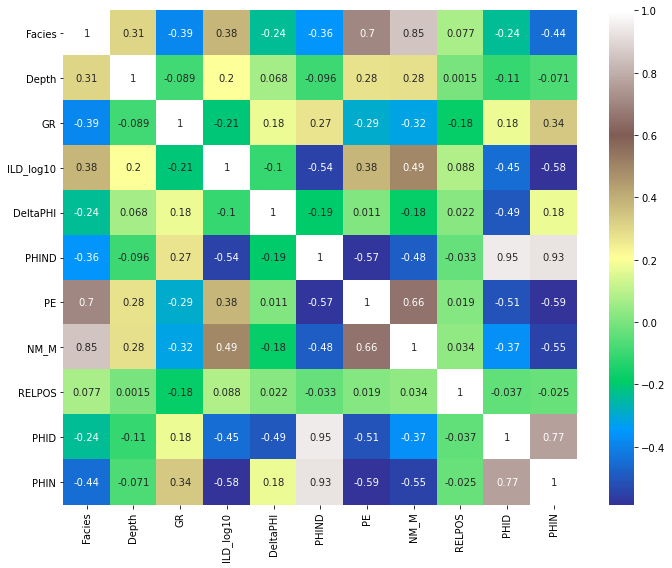

In [16]:
fig,axes = plt.subplots(figsize=(10,8))

sns.heatmap(df.corr(),annot=True,ax=axes,cmap='terrain')

fig.tight_layout()

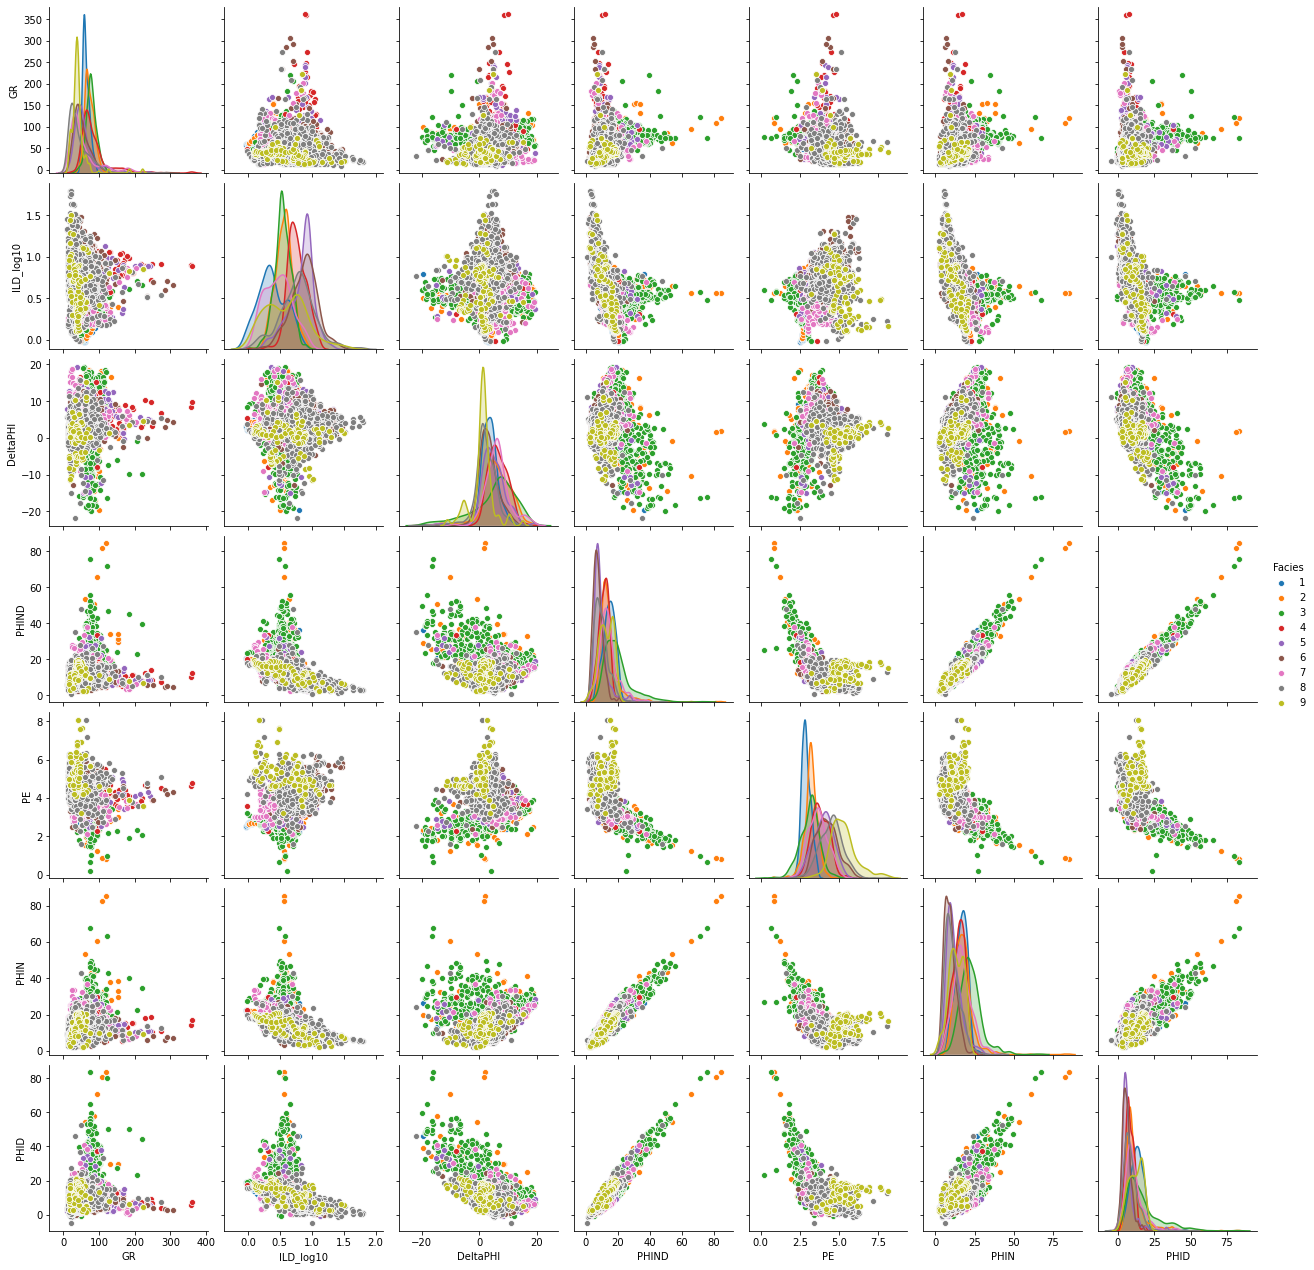

In [17]:
sns.pairplot(df,vars=cols+['PHIN','PHID'],hue='Facies')

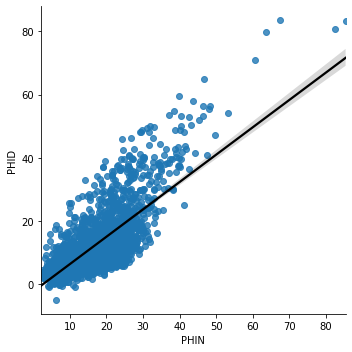

In [18]:
sns.lmplot('PHIN','PHID',data=df,fit_reg=True,line_kws={'color':'black'})

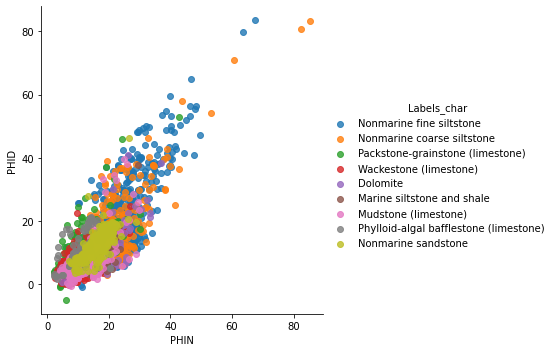

In [19]:
sns.lmplot('PHIN','PHID',data=df,fit_reg=False,hue='Labels_char')

---

#### Criando novas variáveis a partir de variáveis qualitativas

In [20]:
df.Formation.unique()

array(['A1 SH', 'A1 LM', 'B1 SH', 'B1 LM', 'B2 SH', 'B2 LM', 'B3 SH',
       'B3 LM', 'B4 SH', 'B4 LM', 'B5 SH', 'B5 LM', 'C SH', 'C LM'],
      dtype=object)

In [21]:
#Criando uma função para transformar as formações em variáveis qualitativas
def formation_to_num (formation):
    formation_num = np.ones(len(formation))*-999
    aux=0
    for i in sorted(df.Formation.unique()):
        formation_num[df[df.Formation==i].index.values] = aux
        aux+=1
    return formation_num

In [22]:
df['Formation_num'] = formation_to_num(df.Formation)

In [23]:
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Labels_char,PHID,PHIN,Formation_num
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,Nonmarine fine siltstone,6.965,16.865,1.0
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,Nonmarine fine siltstone,5.465,19.665,1.0
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,Nonmarine fine siltstone,5.650,20.450,1.0
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,Nonmarine fine siltstone,6.165,20.065,1.0
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,Nonmarine fine siltstone,6.550,20.050,1.0


In [24]:
df.Formation.unique()

array(['A1 SH', 'A1 LM', 'B1 SH', 'B1 LM', 'B2 SH', 'B2 LM', 'B3 SH',
       'B3 LM', 'B4 SH', 'B4 LM', 'B5 SH', 'B5 LM', 'C SH', 'C LM'],
      dtype=object)

In [25]:
df.Formation_num.unique()

array([ 1.,  0.,  3.,  2.,  5.,  4.,  7.,  6.,  9.,  8., 11., 10., 13.,
       12.])

In [26]:
sorted(df.Formation.unique())

['A1 LM',
 'A1 SH',
 'B1 LM',
 'B1 SH',
 'B2 LM',
 'B2 SH',
 'B3 LM',
 'B3 SH',
 'B4 LM',
 'B4 SH',
 'B5 LM',
 'B5 SH',
 'C LM',
 'C SH']

##### Para as próximas atividades utilizaremos o módulo LabelEncoder do scikit-learn

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
encoder = LabelEncoder()

In [29]:
encoder.fit(df.Formation)

LabelEncoder()

In [30]:
df['Formation_numsk'] = encoder.transform(df.Formation)

In [31]:
for i,j in zip(df.Formation_num.unique(),df.Formation_numsk.unique()):
    print(f'Unique func 01 {i}, Unique Sklearn {j}')

Unique func 01 1.0, Unique Sklearn 1
Unique func 01 0.0, Unique Sklearn 0
Unique func 01 3.0, Unique Sklearn 3
Unique func 01 2.0, Unique Sklearn 2
Unique func 01 5.0, Unique Sklearn 5
Unique func 01 4.0, Unique Sklearn 4
Unique func 01 7.0, Unique Sklearn 7
Unique func 01 6.0, Unique Sklearn 6
Unique func 01 9.0, Unique Sklearn 9
Unique func 01 8.0, Unique Sklearn 8
Unique func 01 11.0, Unique Sklearn 11
Unique func 01 10.0, Unique Sklearn 10
Unique func 01 13.0, Unique Sklearn 13
Unique func 01 12.0, Unique Sklearn 12


#### Predição das medidas de PE utilizando regressão linear simples

In [32]:
PE_null = df[df.PE.isnull()]
dataset = df[~df.PE.isnull()]

In [33]:
PE_null.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Labels_char,PHID,PHIN,Formation_num,Formation_numsk
471,3,A1 SH,ALEXANDER D,2887.5,88.71,0.612,6.7,10.605,NaN,1,1.000,Nonmarine fine siltstone,7.255,13.955,1.0,1
472,3,A1 SH,ALEXANDER D,2888.0,92.71,0.583,11.0,12.515,NaN,1,0.974,Nonmarine fine siltstone,7.015,18.015,1.0,1
473,3,A1 SH,ALEXANDER D,2888.5,94.54,0.579,12.0,13.410,NaN,1,0.949,Nonmarine fine siltstone,7.410,19.410,1.0,1
474,3,A1 SH,ALEXANDER D,2889.0,95.31,0.579,11.5,13.750,NaN,1,0.923,Nonmarine fine siltstone,8.000,19.500,1.0,1
475,3,A1 SH,ALEXANDER D,2889.5,93.79,0.572,10.3,13.405,NaN,1,0.897,Nonmarine fine siltstone,8.255,18.555,1.0,1


In [34]:
dataset.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Labels_char,PHID,PHIN,Formation_num,Formation_numsk
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,Nonmarine fine siltstone,6.965,16.865,1.0,1
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,Nonmarine fine siltstone,5.465,19.665,1.0,1
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,Nonmarine fine siltstone,5.650,20.450,1.0,1
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,Nonmarine fine siltstone,6.165,20.065,1.0,1
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,Nonmarine fine siltstone,6.550,20.050,1.0,1


#### Plotando a matriz de correlação para analisar o comportamento das variáveis em relação ao PE

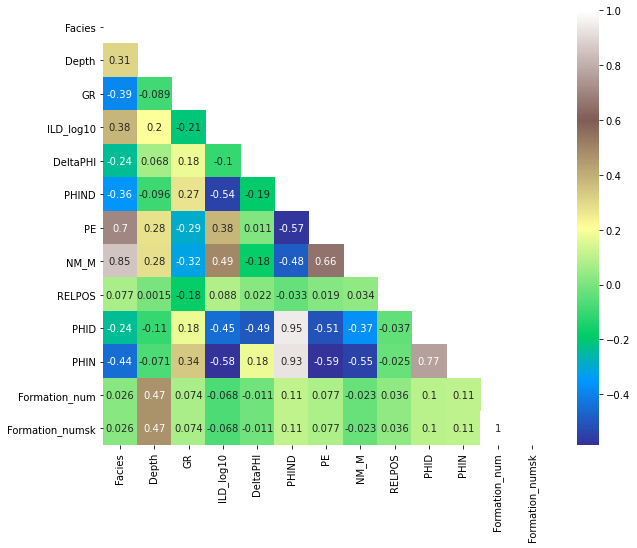

In [35]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig,axes = plt.subplots(figsize=(10,8))
sns.heatmap(corr,mask=mask,cmap='terrain',ax=axes,annot=True)

In [36]:
df.corr()['PE'].abs().sort_values().index

Index(['DeltaPHI', 'RELPOS', 'Formation_num', 'Formation_numsk', 'Depth', 'GR',
       'ILD_log10', 'PHID', 'PHIND', 'PHIN', 'NM_M', 'Facies', 'PE'],
      dtype='object')

#### Separando conjunto em teste e treino

In [37]:
cols = ['DeltaPHI', 'RELPOS', 'Formation_num', 'GR',
       'ILD_log10', 'PHID', 'PHIND', 'PHIN', 'NM_M']

#### Separando o conjunto de dados em treino e teste

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(dataset[cols], dataset['PE'], test_size=0.33)

In [40]:
X_train.head()

,DeltaPHI,RELPOS,Formation_num,GR,ILD_log10,PHID,PHIND,PHIN,NM_M
966,1.7,0.532,1.0,55.180,0.301000,15.055,15.905,16.755,1
3743,2.3,0.258,12.0,49.340,0.763000,3.700,4.850,6.000,2
2386,8.3,0.341,0.0,77.016,1.120837,3.100,7.250,11.400,2
3571,2.6,0.615,8.0,36.280,0.766000,5.100,6.400,7.700,2
3360,5.2,0.573,0.0,56.960,0.721000,9.800,12.400,15.000,2


In [41]:
y_train.head()

966     2.800
3743    4.100
2386    4.147
3571    4.800
3360    3.600
Name: PE, dtype: float64

In [42]:
X_test.head()

,DeltaPHI,RELPOS,Formation_num,GR,ILD_log10,PHID,PHIND,PHIN,NM_M
3254,2.706,0.550,10.0,40.938,0.167000,13.861,15.214,16.567,2
1679,3.700,0.143,8.0,19.360,0.562000,3.700,5.550,7.400,2
3029,5.516,1.000,9.0,65.125,0.523000,12.185,14.943,17.701,1
2647,5.400,0.769,11.0,79.038,0.543696,7.500,10.200,12.900,1
1047,0.200,0.857,3.0,85.550,0.480000,34.190,34.290,34.390,1


In [43]:
y_test.head()

3254    8.094
1679    5.000
3029    2.809
2647    3.130
1047    2.600
Name: PE, dtype: float64

In [44]:
X_train.std()

DeltaPHI          5.169884
RELPOS            0.284889
Formation_num     4.649381
GR               31.842089
ILD_log10         0.239153
PHID              8.486021
PHIND             7.507868
PHIN              7.354418
NM_M              0.500111
dtype: float64

#### Normalizando os dados em função da média e desvio padrão

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [47]:
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

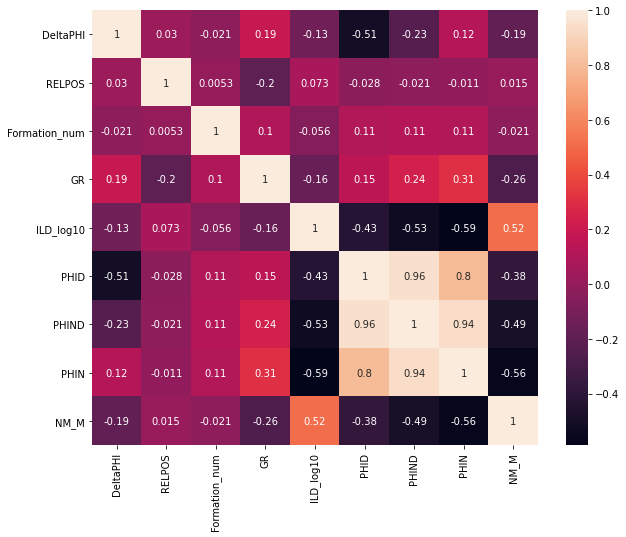

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(X_train.corr(),annot=True)

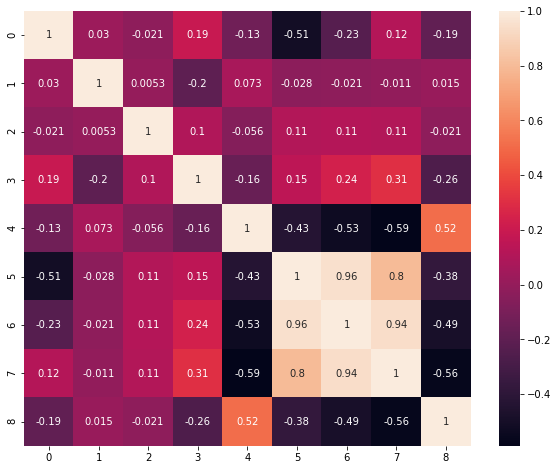

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(np.corrcoef(X_train_scale.T),annot=True)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(scaler.transform(X_train),y_train)

LinearRegression()

In [53]:
for i,j in zip(cols,lr.coef_):
    print(i,j)

DeltaPHI 0.03496509480044533
RELPOS -0.008748537192295408
Formation_num 0.12134819612859814
GR -0.08485375445303889
ILD_log10 -0.05131375585184146
PHID -0.1038794442906222
PHIND -0.10537483774378367
PHIN -0.09528389964796273
NM_M 0.46173865430746336


In [54]:
lr.intercept_

3.7336166281755196

In [55]:
print(f'Erro médio quadrático (Treino): {mean_squared_error(y_train,lr.predict(X_train_scale))}')
print(f'Erro médio quadrático (Teste): {mean_squared_error(y_test,lr.predict(X_test_scale))}')

Erro médio quadrático (Treino): 0.3799093885716348
Erro médio quadrático (Teste): 0.34978815682294784


In [56]:
PE_null['Well Name'].unique()

array(['ALEXANDER D', 'KIMZEY A', 'Recruit F9'], dtype=object)

In [57]:
PE_null['PE_reg'] = lr.predict(scaler.transform(PE_null[cols]))

<ipython-input-57-264f1c6f3348>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PE_null['PE_reg'] = lr.predict(scaler.transform(PE_null[cols]))


In [58]:
# Escolhendo colunas a serem plotadas
cols_2 = ['GR','ILD_log10','DeltaPHI','PHIND','PE_reg']
well = 'KIMZEY A'

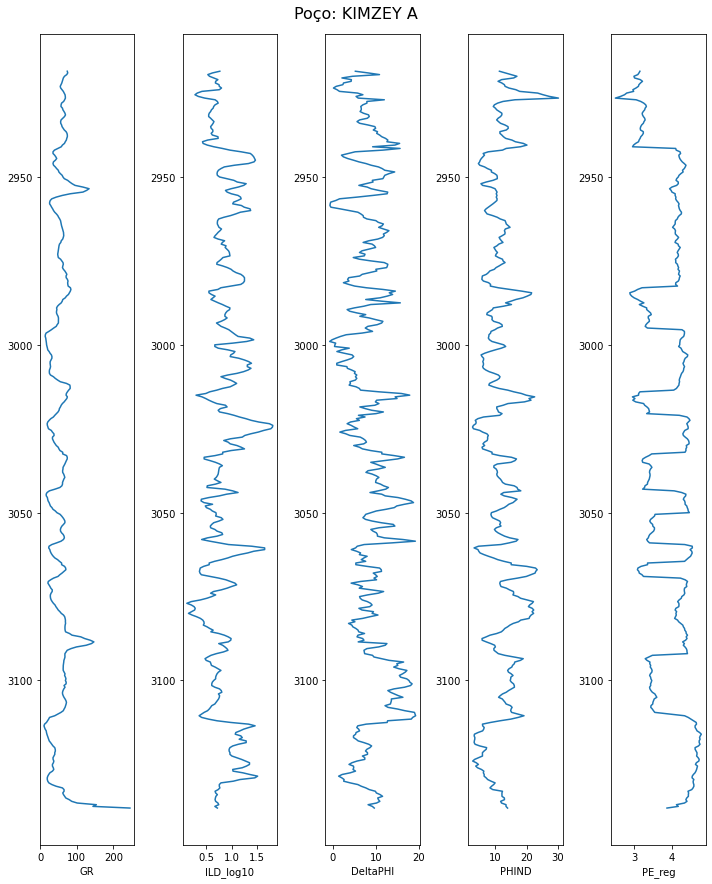

In [59]:
fig,axes = plt.subplots(ncols=5,figsize=(10,12))

for ax in axes:
    ax.invert_yaxis()

for i,ax in zip(cols_2,axes):
    ax.plot(PE_null[PE_null['Well Name']==well][i],PE_null[PE_null['Well Name']==well]['Depth'])
    ax.set_xlabel(i)

fig.suptitle(f'Poço: {well}', fontsize=16,y=1.02)
    
fig.tight_layout()

In [61]:
df

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Labels_char,PHID,PHIN,Formation_num,Formation_numsk
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000,Nonmarine fine siltstone,6.9650,16.8650,1.0,1
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979,Nonmarine fine siltstone,5.4650,19.6650,1.0,1
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957,Nonmarine fine siltstone,5.6500,20.4500,1.0,1
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936,Nonmarine fine siltstone,6.1650,20.0650,1.0,1
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915,Nonmarine fine siltstone,6.5500,20.0500,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685,Mudstone (limestone),6.3400,8.1680,12.0,12
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677,Mudstone (limestone),6.8925,9.1335,12.0,12
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669,Mudstone (limestone),6.5505,9.4755,12.0,12
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661,Mudstone (limestone),6.1665,9.2495,12.0,12


In [64]:
df['Pe_reg'] = lr.predict(scaler.transform(df[cols]))

In [65]:
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Labels_char,PHID,PHIN,Formation_num,Formation_numsk,Pe_reg
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,Nonmarine fine siltstone,6.965,16.865,1.0,1,3.174660
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,Nonmarine fine siltstone,5.465,19.665,1.0,1,3.175835
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,Nonmarine fine siltstone,5.650,20.450,1.0,1,3.159861
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,Nonmarine fine siltstone,6.165,20.065,1.0,1,3.134041
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,Nonmarine fine siltstone,6.550,20.050,1.0,1,3.157286


### Salvando o dataset com o PE_reg

In [66]:
import os

In [67]:
os.getcwd()

'/home/alexsandro/Github/Disciplinas/GEOD67_topicos_de_IA_2020/Tratamento_de_dados'

In [68]:
os.chdir('/home/alexsandro/Github/Disciplinas/GEOD67_topicos_de_IA_2020')

In [69]:
df.to_csv('Dados/facies_dataset_reg_pe.csv',index=False)